<a href="https://colab.research.google.com/github/Byeon-MJ/Kaggle_Repo/blob/main/Kaggle_Cactus_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c aerial-cactus-identification

Saving kaggle.json to kaggle.json
aerial-cactus-identification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls
!unzip aerial-cactus-identification.zip

aerial-cactus-identification.zip  submission.csv  train
sample_data			  test		  train.csv
sample_submission.csv		  test.zip	  train.zip
Archive:  aerial-cactus-identification.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.zip                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
replace train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.zip               


In [ ]:
!ls -al

total 38620
drwxr-xr-x 1 root root     4096 Jan 12 06:49 .
drwxr-xr-x 1 root root     4096 Jan 12 05:06 ..
-rw-r--r-- 1 root root 12543547 Jan 12 05:09 aerial-cactus-identification.zip
drwxr-xr-x 4 root root     4096 Jan 10 14:32 .config
drwxr-xr-x 1 root root     4096 Jan 10 14:33 sample_data
-rw-r--r-- 1 root root   164014 Dec 11  2019 sample_submission.csv
-rw-r--r-- 1 root root   226447 Jan 12 05:33 submission.csv
drwxr-xr-x 2 root root   262144 Jan 12 05:09 test
-rw-r--r-- 1 root root  4408369 Dec 11  2019 test.zip
drwxr-xr-x 2 root root  1081344 Jan 12 05:09 train
-rw-r--r-- 1 root root   682514 Dec 11  2019 train.csv
-rw-r--r-- 1 root root 20148140 Dec 11  2019 train.zip


# EDA

In [ ]:
import pandas as pd

# CSV 데이터
labels = pd.read_csv('train.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
labels.head() # id, has_cactus
# 0 : 선인장이 없고, 1이면 있다
# id = 파일명(jpg)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [ ]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


# 데이터 시각화

## 타겟값 분포

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

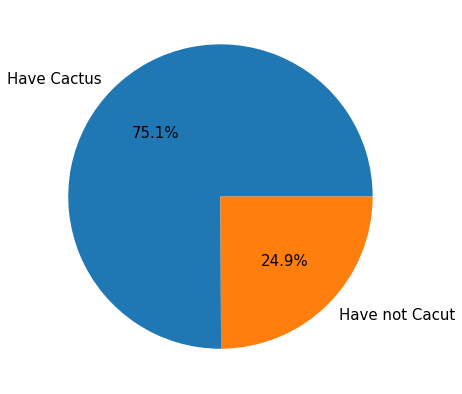

In [ ]:
mpl.rc('font', size = 15)
plt.figure(figsize=(7, 7))
label = ['Have Cactus', "Have not Cacut"]
plt.pie(labels['has_cactus'].value_counts(), labels = label, autopct = '%.1f%%')
plt.show()

### 이미지 출력

In [ ]:
# 압축 풀기
from zipfile import ZipFile
with ZipFile('train.zip') as zipper:
    zipper.extractall()
with ZipFile('test.zip') as zipper:
    zipper.extractall()

In [ ]:
import os

num_train = len(os.listdir('train/'))
num_test = len(os.listdir('test/'))

print(f'훈련 데이터의 수 : {num_train}')
print(f'테스트 데이터의 수 : {num_test}')

훈련 데이터의 수 : 17500
테스트 데이터의 수 : 4000


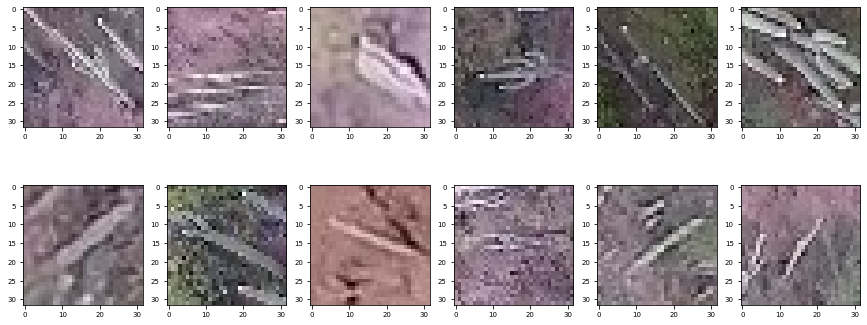

In [ ]:
import cv2  # OpenCV 라이브러리
from matplotlib import gridspec

mpl.rc('font', size=7)
plt.figure(figsize=(15, 6))
grid = gridspec.GridSpec(2, 6)  # subplot : (2행 6열)

# 선인장을 포함하는 이미지 불러오기
last_has_cactus_img_name = labels[labels['has_cactus'] == 1]['id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = 'train/' + img_name
    image = cv2.imread(img_path)                    # 이미지 파일 불러오기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 이미지 색상 보정
    ax = plt.subplot(grid[idx])                     # 자동으로 그리드 위치 잡아줌
    ax.imshow(image)

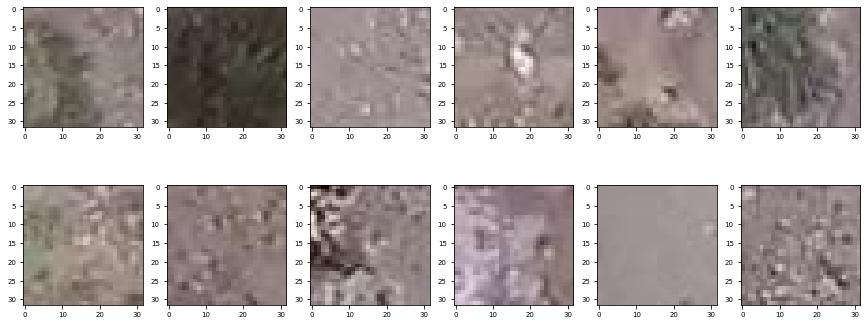

In [ ]:
plt.figure(figsize=(15, 6))
grid = gridspec.GridSpec(2, 6)  # subplot : (2행 6열)

# 선인장을 포함하지 않는 이미지 불러오기
last_not_cactus_img_name = labels[labels['has_cactus'] == 0]['id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_not_cactus_img_name):
    img_path = 'train/' + img_name
    image = cv2.imread(img_path)                    # 이미지 파일 불러오기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 이미지 색상 보정
    ax = plt.subplot(grid[idx])                     # 자동으로 그리드 위치 잡아줌
    ax.imshow(image)

In [ ]:
image.shape

(32, 32, 3)

# 베이스라인 모델

**CNN**
* 베이스라인 모델 : 얕은 CNN
    * 데이터 증강 : X
    * 신경망 구조 : CNN x 2, 풀링, 평탄화, 전결합
    * 옵티마이저 : SGD

## 환경 설정

In [ ]:
import torch
import random
import numpy as np
import os

# seed 고정
seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)                           # 파이썬 난수 생성기 seed
np.random.seed(seed)                        # 넘파이 난수 생성기 seed
torch.manual_seed(seed)                     # 파이토치 난수 생성기 seed (CPU)
torch.cuda.manual_seed(seed)                # 파이토치 난수 생성기 seed (GPU)
torch.cuda.manual_seed_all(seed)            # 파이토치 난수 생성기 seed (멀티 GPU)
torch.backends.cudnn.deterministic = True   # 확정적 연산 사용
torch.backends.cudnn.benchmark = False      # 벤치마크 기능 해제
torch.backends.cudnn.enabled = False        # cudnn 사용 해제

In [ ]:
# GPU 장비 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 데이터 준비

In [ ]:
# 훈련 데이터, 검증 데이터 분리
from sklearn.model_selection import train_test_split

train, valid = train_test_split(labels, test_size=0.1, stratify=labels['has_cactus'], random_state=seed)

In [ ]:
print(f'훈련 데이터 개수 : {len(train)}')
print(f'검증 데이터 개수 : {len(valid)}')

훈련 데이터 개수 : 15750
검증 데이터 개수 : 1750


### 데이터셋 클래스
* torchvision.datasets.FashionMNIST ...

In [ ]:
from torch.utils.data import Dataset
import cv2

# 데이터로더 사용하기 데이터셋 클래스 정의
class ImageDataset(Dataset):
    def __init__(self, df, img_dir='./', transform=None,) -> None:
        super().__init__()

        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    # 1. __len__ 2. __getitem__
    # len : 길이값 정의
    def __len__(self):
        return len(self.df) # 입력받은 df 길이 반환


    # getitem : 인덱스에 맞는 데이터 반환
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx, 0]                   # 이미지 ID(파일 이름)
        img_path = self.img_dir + img_id               # 이미지 파일 전체 경로
        image = cv2.imread(img_path)                    # 이미지 파일 읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 이미지 색 보정
        label = self.df.iloc[idx, 1]                    # 이미지 레이블

        if self.transform is not None:
            image = self.transform(image)       # 변환기가 있다면 이미지 변환
        
        return image, label     # 이미지, 라벨을 받는 데이터셋 구축

### 데이터셋 생성

In [ ]:
from torchvision import transforms

transform = transforms.ToTensor()

In [ ]:
dataset_train = ImageDataset(
    df = train,
    img_dir = 'train/',
    transform=transform
)
dataset_valid = ImageDataset(
    df = valid,
    img_dir = 'train/',
    transform=transform
)

## 데이터 로더 생성
* 배치 사이즈를 지정하면 그만큼 epoch마다 처리

In [ ]:
from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

## 모델 생성

In [ ]:
from torch import nn, optim
from torch.nn import functional as F

In [ ]:
class Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        # 첫번째 합성곱 계층 : (3, 32, 32) -> (32, 34, 34)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2)
        # 첫번째 합성곱 계층 : (32, 34, 34) -> (64, 36, 36)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2)
        
        # MaxPooling
        self.max_pool = nn.MaxPool2d(kernel_size=2)

        # AvgPooling
        self.avg_pool = nn.AvgPool2d(kernel_size=2)

        # 전결합(fully connected)
        self.fc = nn.Linear(in_features=64 * 4 * 4, out_features=2)

    # 순전파 정의
    def forward(self, x):
        # conv1 : (3, 32, 32) -> (32, 34, 34) -> (32, 17, 17)
        x = self.max_pool(F.relu(self.conv1(x)))
        # conv2 : (32, 17, 17) -> (64, 19, 19) -> (64, 9, 9)
        # Pooling ceil_mode : 소숫점 올림,버림 파라미터, 기본값 False(버림)
        x = self.max_pool(F.relu(self.conv2(x)))
        
        # AvgPooling
        x = self.avg_pool(x)

        # (64, 9, 9) -> (64, 4, 4)
        # 전결합 -> 평탄화
        x = x.view(-1, 64*4*4)  # 평탄화 : 1024
        x = self.fc(x)  # 1024 -> 0 또는 1
        return x

In [ ]:
model = Model().to(device)

In [ ]:
import torchsummary

torchsummary.summary(model, (3, 32, 32), 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 34, 34]             896
         MaxPool2d-2           [32, 32, 17, 17]               0
            Conv2d-3           [32, 64, 19, 19]          18,496
         MaxPool2d-4             [32, 64, 9, 9]               0
         AvgPool2d-5             [32, 64, 4, 4]               0
            Linear-6                    [32, 2]           2,050
Total params: 21,442
Trainable params: 21,442
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 18.45
Params size (MB): 0.08
Estimated Total Size (MB): 18.90
----------------------------------------------------------------


## 모델 훈련

In [ ]:
# Loss Function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
import math
math.ceil(len(train) / 32)

493

In [ ]:
len(loader_train)

493

In [ ]:
epochs = 10
for epoch in range(epochs):
    epoch_loss = 0  # 에포크별 손실값 리셋

    for images, labels in loader_train:
        # image, label -> 미니 배치
        images = images.to(device)
        labels = labels.to(device)
        # 기울기 초기화
        optimizer.zero_grad()
        # 순전파
        outputs = model(images)
        # 오차 계산
        loss = criterion(outputs, labels)
        # 손실 추가
        epoch_loss += loss.item()
        # 오차 역전파
        loss.backward()
        # 가중치 갱신
        optimizer.step()

    # 훈련 데이터 손실값 출력
    print(f'에포크 [{epoch+1}/{epochs}] - 손실값: {epoch_loss/len(loader_train):.4f}')

에포크 [1/10] - 손실값: 0.5237
에포크 [2/10] - 손실값: 0.3449
에포크 [3/10] - 손실값: 0.2424
에포크 [4/10] - 손실값: 0.1964
에포크 [5/10] - 손실값: 0.1773
에포크 [6/10] - 손실값: 0.1618
에포크 [7/10] - 손실값: 0.1528
에포크 [8/10] - 손실값: 0.1421
에포크 [9/10] - 손실값: 0.1363
에포크 [10/10] - 손실값: 0.1295


## 성능 검증

In [ ]:
# ROC AUC
from sklearn.metrics import roc_auc_score

true_list = []
preds_list = []

In [ ]:
# 모델 평가
model.eval()

with torch.no_grad():
    for images, labels in loader_valid:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images) # 출력값 계산
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1]
        true = labels.cpu()     # 실제값

        # 예측 확률과 실제값을 리스트에 추가
        preds_list.extend(preds)
        # preds_list.append(preds)
        true_list.extend(true)
        # true_list.append(true)

In [ ]:
# print([(i, v) for i, v in enumerate(zip(true_list, preds_list))])
for i, v in enumerate(zip(true_list, preds_list)):
    print(i, v)

0 (tensor(1), tensor(0.0289))
1 (tensor(1), tensor(0.5192))
2 (tensor(1), tensor(0.9734))
3 (tensor(0), tensor(0.0235))
4 (tensor(1), tensor(0.4725))
5 (tensor(1), tensor(0.9992))
6 (tensor(1), tensor(0.9965))
7 (tensor(1), tensor(0.9532))
8 (tensor(1), tensor(0.2611))
9 (tensor(1), tensor(0.5101))
10 (tensor(0), tensor(0.0172))
11 (tensor(1), tensor(0.8494))
12 (tensor(1), tensor(1.0000))
13 (tensor(1), tensor(0.6574))
14 (tensor(0), tensor(0.0037))
15 (tensor(1), tensor(0.6154))
16 (tensor(1), tensor(0.1604))
17 (tensor(1), tensor(0.7966))
18 (tensor(1), tensor(0.9944))
19 (tensor(1), tensor(0.8503))
20 (tensor(1), tensor(0.1949))
21 (tensor(1), tensor(0.2300))
22 (tensor(1), tensor(0.9594))
23 (tensor(1), tensor(0.9760))
24 (tensor(1), tensor(0.4172))
25 (tensor(1), tensor(0.9938))
26 (tensor(1), tensor(0.8416))
27 (tensor(0), tensor(0.0057))
28 (tensor(1), tensor(0.5317))
29 (tensor(1), tensor(0.4765))
30 (tensor(1), tensor(0.8609))
31 (tensor(1), tensor(0.9995))
32 (tensor(0), ten

In [ ]:
# 검증 데이터 평가
roc_auc_score(true_list, preds_list)

0.9852645469398015

## 예측 및 결과 제출

In [ ]:
dataset_test = ImageDataset(df=submission, img_dir='test/', transform=transform)
loader_test = DataLoader(dataset=dataset_test, batch_size=32, shuffle=False)

In [ ]:
# 예측
model.eval()

preds = []

with torch.no_grad():
    for images, _ in loader_test:
        images = images.to(device)
        outputs = model(images)
        preds_part = torch.softmax(outputs.cpu(), dim=1)[:, 1].tolist()
        preds.extend(preds_part)

In [ ]:
preds

In [ ]:
submission['has_cactus'] = preds
submission['has_cactus']

0       0.621127
1       0.997476
2       0.012420
3       0.005161
4       0.310086
          ...   
3995    0.836892
3996    0.997382
3997    0.966315
3998    0.785788
3999    0.138287
Name: has_cactus, Length: 4000, dtype: float64

In [ ]:
submission.to_csv('submission.csv', index=False)

# 성능 개선
* 이미지 데이터 증강
* CNN 깊이 늘리기
* Optimizer : Adam 로 변경
* epochs 늘리기

In [ ]:
from torchvision import transforms

# 데이터 증강 : 과최적화, 데이터 늘림을 통해 일반화
# 훈련용 데이터 변환
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Pad(32, padding_mode='symmetric'),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Channel 3개, 색상별 정규화
])

# 검증 및 테스트용 데이터 변환
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Pad(32, padding_mode='symmetric'),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Channel 3개, 색상별 정규화
])

In [ ]:
dataset_train = ImageDataset(
    df = train,
    img_dir = 'train/',
    transform=transform_train
)
dataset_valid = ImageDataset(
    df = valid,
    img_dir = 'train/',
    transform=transform_test
)

In [ ]:
from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

## 모델 생성

In [ ]:
from torch import nn, optim
from torch.nn import functional as F

In [ ]:
# BasicBlock 활용하여 모델 생성 방법
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=2),
            nn.BatchNorm2d(out_channels), # **
            nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
            nn.MaxPool2d(kernel_size=2)
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
class Model(nn.Module):

    # 함수화하여 layer 쌓는 방법
    # def make_layer(self, in_channels, out_channels):
    #     model = nn.Sequential(
    #         nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=2),
    #         nn.BatchNorm2d(out_channels), # **
    #         nn.LeakyReLU(), # ** 0.01만큼 음수도 반영
    #         nn.MaxPool2d(kernel_size=2))
    #     return model

    def __init__(self) -> None:
        super().__init__()

        # layer 신경망 정의
        # self.layer1 = BasicBlock(3, 32)
        # self.layer1 = make_layer(3, 32)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=2),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Pooling
        self.avg_pool = nn.AvgPool2d(kernel_size=4)

        # 전결합 계층
        self.fc1 = nn.Linear(in_features=512 * 1 * 1, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=2)

    # 순전파
    def forward(self, x):
        h1 = self.layer1(x)
        h2 = self.layer2(h1)
        h3 = self.layer3(h2)
        h4 = self.layer4(h3)
        h5 = self.layer5(h4)
        h6 = self.avg_pool(h5)
        h7 = h6.view(-1, 512 * 1 * 1) # Flatten
        h8 = self.fc1(h7)
        h9 = self.fc2(h8)
        return h9

In [ ]:
model = Model().to(device)

In [ ]:
torchsummary.summary(model, (3, 32 * 3, 32 * 3), 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 98, 98]             896
       BatchNorm2d-2           [32, 32, 98, 98]              64
         LeakyReLU-3           [32, 32, 98, 98]               0
         MaxPool2d-4           [32, 32, 49, 49]               0
            Conv2d-5           [32, 64, 51, 51]          18,496
       BatchNorm2d-6           [32, 64, 51, 51]             128
         LeakyReLU-7           [32, 64, 51, 51]               0
         MaxPool2d-8           [32, 64, 25, 25]               0
            Conv2d-9          [32, 128, 27, 27]          73,856
      BatchNorm2d-10          [32, 128, 27, 27]             256
        LeakyReLU-11          [32, 128, 27, 27]               0
        MaxPool2d-12          [32, 128, 13, 13]               0
           Conv2d-13          [32, 256, 15, 15]         295,168
      BatchNorm2d-14          [32, 256,

## 모델 훈련

In [ ]:
# Loss
criterion = nn.CrossEntropyLoss()

# Optimizer
# optimizer = optim.Adamax(model.parameters(), lr=0.00006)
optimizer = optim.Adam(model.parameters(), lr=0.00006)

In [ ]:
epochs = 70
for epoch in range(epochs):
    epoch_loss = 0  # 에포크별 손실값 리셋

    for images, labels in loader_train:
        # image, label -> 미니 배치
        images = images.to(device)
        labels = labels.to(device)
        # 기울기 초기화
        optimizer.zero_grad()
        # 순전파
        outputs = model(images)
        # 오차 계산
        loss = criterion(outputs, labels)
        # 손실 추가
        epoch_loss += loss.item()
        # 오차 역전파
        loss.backward()
        # 가중치 갱신
        optimizer.step()

    # 훈련 데이터 손실값 출력
    print(f'에포크 [{epoch+1}/{epochs}] - 손실값: {epoch_loss/len(loader_train):.4f}')

에포크 [1/70] - 손실값: 0.0999
에포크 [2/70] - 손실값: 0.0512
에포크 [3/70] - 손실값: 0.0380
에포크 [4/70] - 손실값: 0.0297
에포크 [5/70] - 손실값: 0.0263
에포크 [6/70] - 손실값: 0.0228
에포크 [7/70] - 손실값: 0.0216
에포크 [8/70] - 손실값: 0.0173
에포크 [9/70] - 손실값: 0.0147
에포크 [10/70] - 손실값: 0.0180
에포크 [11/70] - 손실값: 0.0120
에포크 [12/70] - 손실값: 0.0128
에포크 [13/70] - 손실값: 0.0122
에포크 [14/70] - 손실값: 0.0115
에포크 [15/70] - 손실값: 0.0124
에포크 [16/70] - 손실값: 0.0096
에포크 [17/70] - 손실값: 0.0073
에포크 [18/70] - 손실값: 0.0091
에포크 [19/70] - 손실값: 0.0091
에포크 [20/70] - 손실값: 0.0071
에포크 [21/70] - 손실값: 0.0079
에포크 [22/70] - 손실값: 0.0062
에포크 [23/70] - 손실값: 0.0068
에포크 [24/70] - 손실값: 0.0067
에포크 [25/70] - 손실값: 0.0061
에포크 [26/70] - 손실값: 0.0046
에포크 [27/70] - 손실값: 0.0055
에포크 [28/70] - 손실값: 0.0065
에포크 [29/70] - 손실값: 0.0062
에포크 [30/70] - 손실값: 0.0034
에포크 [31/70] - 손실값: 0.0065
에포크 [32/70] - 손실값: 0.0045
에포크 [33/70] - 손실값: 0.0039
에포크 [34/70] - 손실값: 0.0047
에포크 [35/70] - 손실값: 0.0024
에포크 [36/70] - 손실값: 0.0064
에포크 [37/70] - 손실값: 0.0022
에포크 [38/70] - 손실값: 0.0061
에포크 [39/70] - 손실값: 0.

In [ ]:
# ROC AUC
from sklearn.metrics import roc_auc_score

true_list = []
preds_list = []

# 모델 평가
model.eval()

with torch.no_grad():
    for images, labels in loader_valid:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images) # 출력값 계산
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1]
        true = labels.cpu()     # 실제값

        # 예측 확률과 실제값을 리스트에 추가
        preds_list.extend(preds)
        # preds_list.append(preds)
        true_list.extend(true)
        # true_list.append(true)

In [ ]:
roc_auc_score(true_list, preds_list)

0.9998682152681776

## 예측 및 제출

In [ ]:
dataset_test = ImageDataset(df=submission, img_dir='test/', transform=transform_test)
loader_test = DataLoader(dataset=dataset_test, batch_size=32, shuffle=False)

In [ ]:
# 예측
model.eval()

preds = []

with torch.no_grad():
    for images, _ in loader_test:
        images = images.to(device)
        outputs = model(images)
        preds_part = torch.softmax(outputs.cpu(), dim=1)[:, 1].tolist()
        preds.extend(preds_part)

In [ ]:
preds

[1.0,
 1.0,
 2.4044686142588034e-05,
 3.564292273949832e-05,
 0.569452702999115,
 1.0,
 1.0,
 1.0,
 1.0,
 1.4122766515356489e-05,
 1.0,
 1.0,
 1.0,
 0.9999591112136841,
 4.340612576925196e-05,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.1028716471628286e-05,
 1.0,
 5.2441562729654834e-05,
 1.0,
 6.432941881939769e-05,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9998329877853394,
 1.0,
 1.0,
 1.0,
 1.0,
 1.7133548681158572e-05,
 0.9999991655349731,
 6.688552093692124e-05,
 0.9996374845504761,
 1.0,
 1.0,
 1.0,
 3.6818354942624865e-07,
 1.8910593553300714e-06,
 1.0,
 1.2332081951171858e-06,
 1.0,
 1.0,
 1.0,
 0.018723156303167343,
 8.529588376404718e-05,
 1.0,
 0.0004021738131996244,
 0.9999996423721313,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.072380645287922e-06,
 1.0,
 1.0,
 3.160666665280587e-06,
 5.216205317992717e-05,
 1.0,
 1.0,
 1.848885176514159e-06,
 1.0,
 1.0,
 1.0,
 1.0,
 0.00015744767733849585,
 8.690277900313959e-05,
 1.0,
 4.273328886483796e-05,
 2.949608187918784e-06,
 1.0,
 1.0,
 0.9999998807907104,


In [ ]:
submission['has_cactus'] = preds
submission['has_cactus']

0       1.000000
1       1.000000
2       0.000024
3       0.000036
4       0.569453
          ...   
3995    1.000000
3996    1.000000
3997    1.000000
3998    1.000000
3999    1.000000
Name: has_cactus, Length: 4000, dtype: float64

In [ ]:
submission.to_csv('submission.csv', index=False)

## 추가 개선 요소
* Optimizer : Adam으로 (했음)
* Trainset Split 없이 (데이터셋 증가)